# Stress detection is a challenging task, as there are so many words that can be used by people on their posts that can show whether a person is having psychological stress or not. While looking for datasets that I can use to train a machine learning model for stress detection

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("C:\\Users\\saurabh\\Desktop\\pyth\\stress.csv")
df.head() 

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


In [3]:
df.isnull().sum() 

id                          0
subreddit                   0
post_id                     0
sentence_range              0
text                        0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

# So this dataset does not have any null values. Now let’s prepare the text column of this dataset to clean the text column with stopwords, links, special symbols and language errors:

In [4]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))


def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["text"] = df["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saurabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Now let’s have a look at the most used words by the people sharing about their life problems on social media by visualizing a word cloud of the text column:

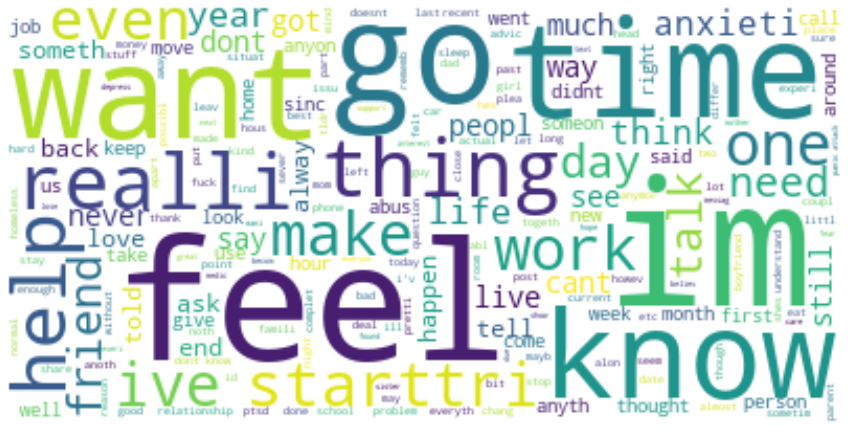

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
# !pip install wordcloud 

# The label column in this dataset contains labels as 0 and 1. 0 means no stress, and 1 means stress. I will use Stress and No stress labels instead of 1 and 0. So let’s prepare this column accordingly and select the text and label columns for the process of training a machine learning model:

In [7]:
df["label"] = df["label"].map({0: "No Stress", 1: "Stress"})
df = df[["text", "label"]]
print(df.head())

                                                text      label
0  like want not“ problem take longer ask friend ...  No Stress
1  man front desk titl hr custom servic repres  j...  No Stress
2  wed save much money new housrit expens citi go...     Stress
3  ex use shoot back want go time matter almost w...     Stress
4  haven't said anyth yet i'm sure someon would t...  No Stress


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(df["text"])
y = np.array(df["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

# As this task is based on the problem of binary classification, I will be using the Bernoulli Naive Bayes algorithm, which is one of the best algorithms for binary classification problems. So let’s train the stress detection model:

In [9]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

# Now let’s test the performance of our model on some random sentences based on mental health:

In [14]:
# user = input("Enter a Text: ")
# data = cv.transform([user]).toarray()
# output = model.predict(data)
# print(output)

Enter a Text: 'wed save much money new housrit expens citi googl languag found illeg excit like oh ok happen ill call polic  googl turn sign contract everyth side contract long term wed give  notic leav even give next week ill still live six month wanna die swear havent helpless scare long also two day ago friend mention ran ex ruin life told want see mw get closur'
['Stress']


In [15]:
# df['text'][2] check for stress 